In [24]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi,sqrt,e,shape,zeros,fft
import scipy.special as sc


DFT:
$$\hat{F}(k) = \frac{L}{N}\sum_{n=N/2}^{N/2-1}f(x)e^{\frac{-i2\pi kx}{N}}$$
IDFT:
$$f(x) = \frac{1}{L}\sum_{n=N/2}^{N/2-1}\hat{F}(k)e^{\frac{i2\pi kx}{N}}$$



In [2]:
def my_fft(f,L,N,dx):
    fft = np.zeros(N,dtype = 'complex')
    shift = N/2
    for k in range(N):
        for n in range(N):
            fft[k] += dx*f[n]*np.e**(-(1j*2*np.pi/N)*(k-shift)*(n-shift))
    return fft

def my_ifft(F,L,N,dx):
    ifft = np.zeros(N,dtype = 'complex')
    shift = N/2
    for n in range(N):
        for k in range(N):
            ifft[n] += (1/L)*F[k]*np.e**((1j*2*np.pi/N)*(k-shift)*(n-shift))
    return ifft

In [3]:
def fresnel_weights(L,x,y,z,k):
    X, Y = np.meshgrid(x, y)
    fres_x = zeros(shape(X),dtype = 'complex')
    fres_y = zeros(shape(X),dtype = 'complex')
    W = 1/(2*dx)
    delta = dx

    for m in range(len(x)):
        for j in range(len(x)):
            slide = x[m] - x[j]
            u_1x = -pi*sqrt(2*z/k)*W - sqrt(k/(2*z))*slide
            u_2x = pi*sqrt(2*z/k)*W - sqrt(k/(2*z))*slide
            S_1x,C_1x = sc.fresnel(u_1x*sqrt(2/pi))
            S_2x,C_2x = sc.fresnel(u_2x*sqrt(2/pi))
            phi_x = (delta/pi)*sqrt(k/(2*z))*e**(1j*slide**2*k/(2*z))*sqrt(pi/2)*(C_2x - C_1x - 1j*(S_2x - S_1x))
            fres_x[m,j] = phi_x

    for n in range(len(y)):
        for l in range(len(y)):
            slide = y[n] - y[l]
            u_1y = -pi*sqrt(2*z/k)*W - sqrt(k/(2*z))*slide
            u_2y = pi*sqrt(2*z/k)*W - sqrt(k/(2*z))*slide
            S_1y,C_1y = sc.fresnel(u_1y*sqrt(2/pi))
            S_2y,C_2y = sc.fresnel(u_2y*sqrt(2/pi))
            phi_y = (delta/pi)*sqrt(k/(2*z))*e**(1j*slide**2*k/(2*z))*sqrt(pi/2)*(C_2y - C_1y - 1j*(S_2y - S_1y))
            fres_y[n,l] = phi_y

    return fres_x,fres_y

1D Gaussian: 
$$f(x) = e^{-(x^2)}$$
$$f'(x) = -2xe^{-(x^2)}$$
Using FT and IFT: 
$$f'(x) = \int_{-L/2}^{L/2}ik\hat{F}(k)e^{i2\pi kx}dk$$


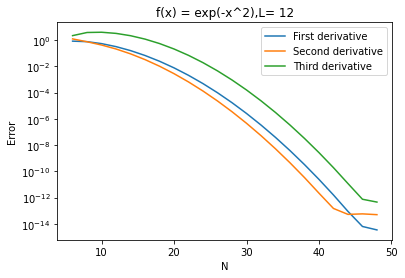

In [4]:
L = 12
N_steps = np.arange(6,50,2)
f = lambda x:np.e**(-x**2)
fd = lambda x:-2*x*np.e**(-x**2)
fdd = lambda x:(4*x**2 -2)*np.e**(-x**2)
fddd = lambda x:(2*x**2 -3)*-4*x*np.e**(-x**2)


error_1d = []
error_2d = []
error_3d = []
for i in range(len(N_steps)):
    N = N_steps[i]
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    func = f(x)
    fft = my_fft(func,L,N,dx)
    freq = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    
    fftd = (1j*freq)*fft
    error_1d.append(np.linalg.norm(my_ifft(fftd,L,N,dx)-fd(x)))
    fftdd = (1j*freq)**2*fft
    error_2d.append(np.linalg.norm(my_ifft(fftdd,L,N,dx)-fdd(x)))
    fftddd = (1j*freq)**3*fft
    error_3d.append(np.linalg.norm(my_ifft(fftddd,L,N,dx)-fddd(x)))

plt.plot(N_steps,error_1d,label = 'First derivative')
plt.plot(N_steps,error_2d,label = 'Second derivative')
plt.plot(N_steps,error_3d,label = 'Third derivative')
plt.title('f(x) = exp(-x^2),L= 12')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()

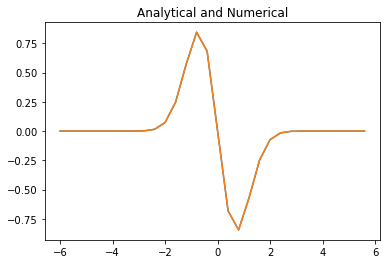

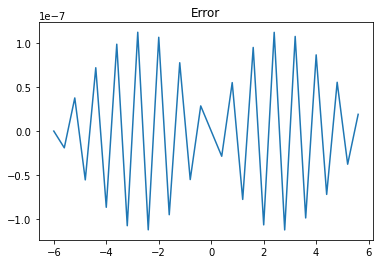

2.587527923931002e-06


In [5]:
L = 12
N = 30
dx = L/N
x = np.linspace(-L/2,L/2-dx,N)
f = np.e**(-(x**2))
fft = my_fft(f,L,N,dx)
freq = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
fftd = (1j*freq)*fft

fd = -2*x*np.e**(-(x**2))
plt.plot(x,fd)
plt.plot(x,my_ifft(fftd,L,N,dx).real)
plt.title('Analytical and Numerical')
plt.show()

plt.plot(x,my_ifft(fftd,L,N,dx).real-fd)
plt.title('Error')
plt.show()

    
print(np.linalg.norm(my_ifft(fftd,L,N,dx)-fd))


1D Gaussian: 
$$f(x) = e^{\sin(x)}$$
$$f'(x) = \cos(x)e^{sin(x)}$$
$$f''(x) = -\sin(x)e^{sin(x)} + \cos^2(x)e^{sin(x)}$$
$$f'''(x) = -\cos(x)e^{sin(x)} -\sin(x)\cos(x)e^{sin(x)} - 2\cos(x)\sin(x)e^{sin(x)} + \cos^3(x)e^{sin(x)}$$
Using FT and IFT: 
$$f'(x) = \int_{-L/2}^{L/2}ik\hat{F}(k)e^{i2\pi kx}dk$$
$$f''(x) = \int_{-L/2}^{L/2}(ik)^2\hat{F}(k)e^{i2\pi kx}dk$$
$$f''(x) = \int_{-L/2}^{L/2}(ik)^3\hat{F}(k)e^{i2\pi kx}dk$$

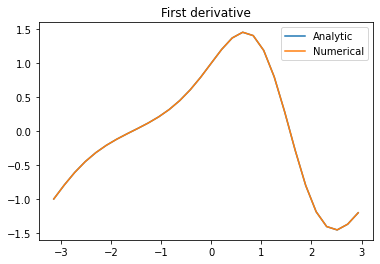

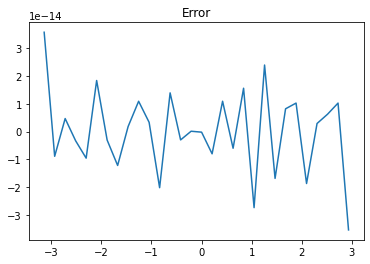

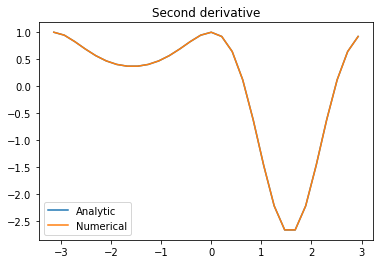

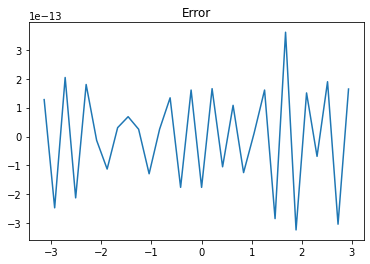

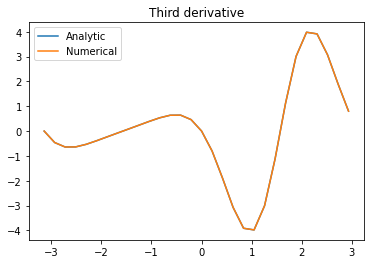

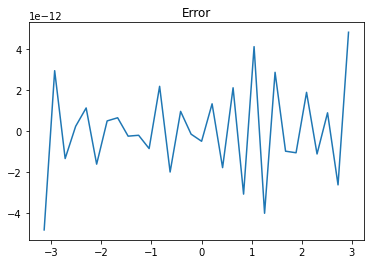

In [6]:
f = lambda x:np.e**(np.sin(x))
L = 2*np.pi
N = 30
dx = L/N
x = np.linspace(-L/2,L/2-dx,N)
func = f(x)
fft = my_fft(func,L,N,dx)
freq = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L

fftd = (1j*freq)*fft
fd = lambda x:np.cos(x)*np.e**(np.sin(x))
f_d = fd(x)
plt.plot(x,f_d,label = 'Analytic')
plt.plot(x,my_ifft(fftd,L,N,dx).real,label = 'Numerical')
plt.title('First derivative')
plt.legend()
plt.show()

plt.plot(x,my_ifft(fftd,L,N,dx).real-f_d)
plt.title('Error')
plt.show()


fftdd = (1j*freq)**2*fft

fdd = lambda x:np.cos(x)**2*np.e**(np.sin(x)) - np.sin(x)*np.e**(np.sin(x))
f_dd = fdd(x)
plt.plot(x,f_dd,label = 'Analytic')
plt.plot(x,my_ifft(fftdd,L,N,dx).real,label = 'Numerical')
plt.title('Second derivative')
plt.legend()
plt.show()

plt.plot(x,my_ifft(fftdd,L,N,dx).real-f_dd)
plt.title('Error')
plt.show()


fddd = lambda x:np.cos(x)**3*np.e**(np.sin(x)) - np.sin(x)*np.cos(x)*np.e**(np.sin(x)) - np.cos(x)*np.e**(np.sin(x)) - 2*np.cos(x)*np.sin(x)*np.e**(np.sin(x))
fftddd = (1j*freq)**3*fft

f_ddd = fddd(x)
plt.plot(x,f_ddd,label = 'Analytic')
plt.plot(x,my_ifft(fftddd,L,N,dx).real,label = 'Numerical')
plt.title('Third derivative')
plt.legend()
plt.show()

plt.plot(x,my_ifft(fftddd,L,N,dx).real-f_ddd)
plt.title('Error')
plt.show()

In [33]:
L = 2*np.pi
N_steps = np.arange(6,40,2)
f = lambda x:np.e**(np.sin(x))
fd = lambda x:np.cos(x)*np.e**(np.sin(x))
fdd = lambda x:np.cos(x)**2*np.e**(np.sin(x)) - np.sin(x)*np.e**(np.sin(x))
fddd = lambda x:np.cos(x)**3*np.e**(np.sin(x)) - np.sin(x)*np.cos(x)*np.e**(np.sin(x)) - np.cos(x)*np.e**(np.sin(x)) - 2*np.cos(x)*np.sin(x)*np.e**(np.sin(x))

error = []
error_1d = []
error_2d = []
error_3d = []
for i in range(len(N_steps)):
    N = N_steps[i]
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    func = f(x)
    fft = my_fft(func,L,N,dx)
    error.append(np.linalg.norm(my_ifft(fft,L,N,dx)-f(x)))
    
    freq = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    fftd = (1j*freq)*fft
    error_1d.append(np.linalg.norm(my_ifft(fftd,L,N,dx)-fd(x)))
    fftdd = (1j*freq)**2*fft
    error_2d.append(np.linalg.norm(my_ifft(fftdd,L,N,dx)-fdd(x)))
    fftddd = (1j*freq)**3*fft
    error_3d.append(np.linalg.norm(my_ifft(fftddd,L,N,dx)-fddd(x)))

# plt.plot(N_steps,error,label = 'Original')
plt.plot(N_steps,error_1d,label = 'First derivative')
plt.plot(N_steps,error_2d,label = 'Second derivative')
plt.plot(N_steps,error_3d,label = 'Third derivative')
plt.title('f(x) = exp(sin(x)),L= 2π')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()

In [30]:
def three_d(X,Y,z,title): #Takes meshgrid and 'title'
    fig = plt.figure(figsize = (12,12))
    ax = plt.axes(projection='3d')

    surf = ax.plot_surface(X, Y, z, cmap = plt.cm.cividis)
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=10)
    plt.title(title)
    fig.colorbar(surf, shrink=0.3, aspect=20)
#     ax.view_init(90, 45)
    ax.view_init(10, 20)
    plt.show()

def interact_threed(X,Y,Z):
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    import numpy as np
    %matplotlib qt

    fig = plt.figure(dpi=200)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap = 'plasma',
                   linewidth=1, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    for angle in range(0, 360):
           ax.view_init(30, 40)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()

In [9]:
def my_fft_2d(f,L,N,dx):
    m,n = np.shape(f)
    fft2 = np.zeros((m,n),dtype = 'complex_')
    for i in range(m):
        fft2[i] = my_fft(f[i],L,N,dx)
    for j in range(n):
        fft2[:,j] = my_fft(fft2[:,j],L,N,dx)
    return fft2

def my_ifft_2d(F,L,N,dx):
    m,n = np.shape(F)
    ifft2 = np.zeros((m,n),dtype = 'complex_')
    for i in range(m):
        ifft2[i] = my_ifft(F[i],L,N,dx)
    for j in range(n):
        ifft2[:,j] = my_ifft(ifft2[:,j],L,N,dx)
    return ifft2 

def my_ifft_2d_deriv(F,L,N,dx,F_x,F_y):
    m,n = np.shape(F)
    ifft2 = np.zeros((m,n),dtype = 'complex_')
    freq_x = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    freq_y = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    for i in range(m):
        ifft2[i] = my_ifft((1j*freq_x)**F_x*F[i],L,N,dx)
    for j in range(n):
        ifft2[:,j] = my_ifft((1j*freq_y)**F_y*ifft2[:,j],L,N,dx)      
    return ifft2 

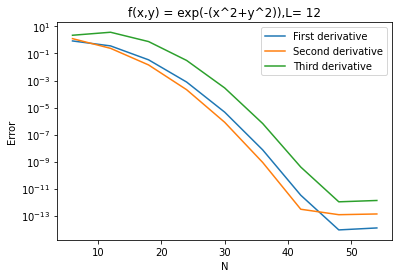

In [10]:
L = 12
N_steps = np.arange(6,60,6)

f = lambda X,Y: np.e**(-(X**2 + Y**2))
f_x = lambda X,Y: -2*X*np.e**(-(X**2 + Y**2))
f_xx = lambda X,Y: (4*X**2-2)*np.e**(-(X**2 + Y**2))
f_xxx = lambda X,Y: -4*X*(2*X**2-3)*np.e**(-(X**2 + Y**2))

error_1d = []
error_2d = []
error_3d = []

for i in range(len(N_steps)): 
    N = N_steps[i]
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    y = np.linspace(-L/2,L/2-dx,N)
    X, Y = np.meshgrid(x, y)
    
    F = my_fft_2d(f(X,Y),L,N,dx)
    error_1d.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,1,0)-f_x(X,Y)))
    error_2d.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,2,0)-f_xx(X,Y)))
    error_3d.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,3,0)-f_xxx(X,Y)))
    
    
plt.plot(N_steps,error_1d,label = 'First derivative')
plt.plot(N_steps,error_2d,label = 'Second derivative')
plt.plot(N_steps,error_3d,label = 'Third derivative')
plt.title('f(x,y) = exp(-(x^2+y^2)),L= 12')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()   
    

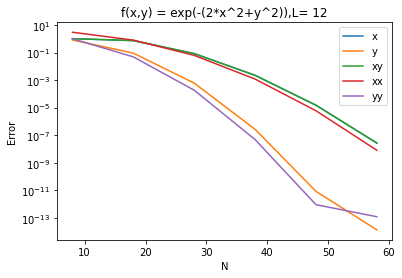

In [11]:
L = 14
N_steps = np.arange(8,60,10)

f = lambda X,Y: np.e**(-(2*X**2 + Y**2))
f_x = lambda X,Y: -4*X*np.e**(-(2*X**2 + Y**2))
f_y = lambda X,Y: -2*Y*np.e**(-(2*X**2 + Y**2))
f_xy = lambda X,Y: (8*X*Y)*np.e**(-(2*X**2 + Y**2))
f_xx = lambda X,Y: 4*(4*X**2-1)*np.e**(-(2*X**2 + Y**2))
f_yy = lambda X,Y: (4*Y**2-2)*np.e**(-(2*X**2 + Y**2))

error_x = []
error_y = []
error_xy = []
error_xx = []
error_yy = []

for i in range(len(N_steps)): 
    N = N_steps[i]
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    y = np.linspace(-L/2,L/2-dx,N)
    X, Y = np.meshgrid(x, y)
    F = my_fft_2d(f(X,Y),L,N,dx)
    error_x.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,1,0)-f_x(X,Y)))
    error_y.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,0,1)-f_y(X,Y)))
    error_xy.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,1,1)-f_xy(X,Y)))
    error_xx.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,2,0)-f_xx(X,Y)))
    error_yy.append(np.linalg.norm(my_ifft_2d_deriv(F,L,N,dx,0,2)-f_yy(X,Y)))
    
plt.plot(N_steps,error_x,label = 'x')
plt.plot(N_steps,error_y,label = 'y')
plt.plot(N_steps,error_xy,label = 'xy')
plt.plot(N_steps,error_xx,label = 'xx')
plt.plot(N_steps,error_yy,label = 'yy')
plt.title('f(x,y) = exp(-(2*x^2+y^2)),L= 12')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()  

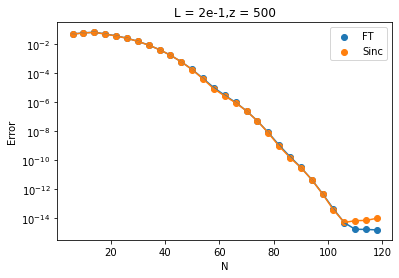

In [12]:
error_sinc = []
grid_sinc = []
error_four = []
grid_four = []
for N in range(6,120,4):
    L = 3e-1
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    y = np.linspace(-L/2,L/2-dx,N)
    X, Y = np.meshgrid(x, y)

    w = 1e-2
    f = np.e**(-(X**2 + Y**2)/(w**2))

    lam = 1e-6
    k = np.pi*2/lam
    z = 100

    w_x,w_y = fresnel_weights(L,x,y,z,k)
    U = e**(1j*k*z)*w_x@f@w_y.T
    
    fd = (1/np.sqrt(1+(2*z/(k*w**2))**2))*np.e**((-1/(w**2))*(X**2+Y**2)/(1+(2*z/(k*w**2))**2)+ 1j*k*z-1j*np.arctan(2*z/(k*w**2)) + (1j*k/(2*z))*((X**2+Y**2)/(1+(k*w**2/(2*z))**2)))
    
    error_sinc.append(np.linalg.norm(abs(fd) - abs(U))/np.linalg.norm(fd))
    grid_sinc.append(N)
    
    freq_x = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    freq_y = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    
#     fft2 = my_fft_2d(f,L,N,dx)
    fft2 = np.fft.fftshift(np.fft.fft2(f))

    freq_x,freq_y = np.meshgrid(freq_x,freq_y)
    fft2_prop = np.e**(1j*k*z)*fft2*np.e**(((freq_y)**2 + (freq_x)**2)*z/(2*1j*k))

#     ifft2 = my_ifft_2d(fft2_prop,L,N,dx)
    ifft2 = np.fft.ifft2(fft2_prop)
    

    fd = (1/np.sqrt(1+(2*z/(k*w**2))**2))*np.e**((-1/(w**2))*(X**2+Y**2)/(1+(2*z/(k*w**2))**2)+ 1j*k*z-1j*np.arctan(2*z/(k*w**2)) + (1j*k/(2*z))*((X**2+Y**2)/(1+(k*w**2/(2*z))**2)))
    error_four.append(np.linalg.norm(abs(fd) - abs(ifft2))/np.linalg.norm(fd))
    grid_four.append(N)
    
plt.plot(grid_four,error_four)
plt.scatter(grid_four,error_four,label = 'FT')
plt.plot(grid_sinc,error_sinc)
plt.scatter(grid_sinc,error_sinc,label = 'Sinc')
plt.title('L = 2e-1,z = 500')
plt.ylabel('Error')
plt.xlabel('N')
plt.yscale('log')
plt.legend()
plt.show()
    

In [17]:
# np.load('Master_sinc.npy')

In [25]:
def circular_aperature_ft_builtin(L,N):
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    y = np.linspace(-L/2,L/2-dx,N)
    freq_x = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    freq_y = np.linspace(-N/2,N/2-1,N)*(2*np.pi)/L
    X, Y = np.meshgrid(x, y)
    freq_x,freq_y = np.meshgrid(freq_x,freq_y)
    
    r_0 = 1e-3
    x_0 = 0
    y_0 = 0
    z_0 = -3e-2
    A = 3e-2

    lam = 1e-5
    k = np.pi*2/lam
    z = 0

    circ = np.sqrt(X**2 + Y**2)/r_0

    for i in range(len(x)):
        for j in range(len(y)): 
            if circ[i,j] > 1:
                circ[i,j] = 0
            else: 
                circ[i,j] = 1
            
    f = A*circ*(np.e**(1j*k*np.sqrt((X-x_0)**2 + (Y-y_0)**2 + (z-z_0)**2)))/np.sqrt((X-x_0)**2 + (Y-y_0)**2 + (z-z_0)**2) 
    
    z = .015
    
    fft2 = fft.fftshift(fft.fft2(f))
    
    fft2_prop = np.e**(1j*k*z)*fft2*np.e**(((freq_y)**2 + (freq_x)**2)*z/(2*1j*k))
    
    return fft.ifft2(fft2_prop)

In [26]:
def circular_aperature_sinc(L,N):
    dx = L/N
    x = np.linspace(-L/2,L/2-dx,N)
    y = np.linspace(-L/2,L/2-dx,N)
    X, Y = np.meshgrid(x, y)
    
    r_0 = 1e-3
    x_0 = 0
    y_0 = 0
    z_0 = -3e-2
    A = 3e-2

    lam = 1e-5
    k = np.pi*2/lam
    z = 0

    circ = np.sqrt(X**2 + Y**2)/r_0

    for i in range(len(x)):
        for j in range(len(y)): 
            if circ[i,j] > 1:
                circ[i,j] = 0
            else: 
                circ[i,j] = 1
            
    f = A*circ*(np.e**(1j*k*np.sqrt((X-x_0)**2 + (Y-y_0)**2 + (z-z_0)**2)))/np.sqrt((X-x_0)**2 + (Y-y_0)**2 + (z-z_0)**2)  

    z = .015
    w_x,w_y = fresnel_weights(L,x,y,z,k)
    return e**(1j*k*z)*w_x@f@w_y.T


In [27]:
L = 4e-3
N = 400
dx = L/N
x = np.linspace(-L/2,L/2-dx,N)
y = np.linspace(-L/2,L/2-dx,N)
X, Y = np.meshgrid(x, y)
    
ft = circular_aperature_ft_builtin(L,N)
sinc = circular_aperature_sinc(L,N)

In [28]:
np.save('Circ-FT-graph',abs(ft)**2)
np.save('Circ-Sinc2-graph',abs(sinc)**2)

In [32]:
interact_threed(X,Y,abs(ft)**2)